In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option("display.max_columns", None)
plt.style.use("seaborn-v0_8")

# Load datasets
field_desc = pd.read_csv("Field Descriptions.xlsx - Sheet1.csv")
telcom_data = pd.read_csv("telcom_data (2).xlsx - Sheet1.csv")

print("✅ Field Descriptions shape:", field_desc.shape)
print("✅ Telcom Data shape:", telcom_data.shape)


✅ Field Descriptions shape: (56, 2)
✅ Telcom Data shape: (150001, 55)


In [5]:
# Preview metadata
field_desc.head(10)

# Create dictionary mapping
field_dict = dict(zip(field_desc['Fields'], field_desc['Description']))

# Show full data dictionary
print("📘 Data Dictionary:")
for k, v in field_dict.items():
    print(f"- {k}: {v}")


📘 Data Dictionary:
- bearer id: xDr session identifier
- Dur. (ms): Total Duration of the xDR (in ms)
- Start: Start time of the xDR (first frame timestamp)
- Start ms: Milliseconds offset of start time for the xDR (first frame timestamp)
- End: End time of the xDR (last frame timestamp)
- End ms: Milliseconds offset of end time of the xDR (last frame timestamp)
- Dur. (s): Total Duration of the xDR (in s)
- IMSI: International Mobile Subscriber Identity
- MSISDN/Number: MS International PSTN/ISDN Number of mobile - customer number
- IMEI: International Mobile Equipment Identity
- Last Location Name: User location call name (2G/3G/4G) at the end of the bearer
- Avg RTT DL (ms): Average Round Trip Time measurement Downlink direction (msecond)
- Avg RTT UL (ms): Average Round Trip Time measurement Uplink direction (msecond)
- Avg Bearer TP DL (kbps): Average Bearer Throughput for Downlink (kbps) - based on BDR duration
- Avg Bearer TP UL (kbps): Average Bearer Throughput for uplink (kbps

In [6]:
# Preview first rows
telcom_data.head()

# Info summary
telcom_data.info()

# Missing values
missing = telcom_data.isnull().sum()
print("\n🔍 Missing Values (Top 10):")
print(missing.sort_values(ascending=False).head(10))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

In [7]:
# Convert datetime columns
telcom_data['Start'] = pd.to_datetime(telcom_data['Start'], errors='coerce')
telcom_data['End']   = pd.to_datetime(telcom_data['End'], errors='coerce')

# Drop duplicate rows
telcom_data.drop_duplicates(inplace=True)

# Fill numeric nulls with 0
num_cols = telcom_data.select_dtypes(include=[np.number]).columns
telcom_data[num_cols] = telcom_data[num_cols].fillna(0)

# Confirm
print("✅ Data cleaned successfully")
telcom_data.info()


C:\Users\ompra\AppData\Local\Temp\ipykernel_14116\929209194.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  telcom_data['Start'] = pd.to_datetime(telcom_data['Start'], errors='coerce')
C:\Users\ompra\AppData\Local\Temp\ipykernel_14116\929209194.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  telcom_data['End']   = pd.to_datetime(telcom_data['End'], errors='coerce')


✅ Data cleaned successfully
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   Bearer Id                                 150001 non-null  float64       
 1   Start                                     150000 non-null  datetime64[ns]
 2   Start ms                                  150001 non-null  float64       
 3   End                                       150000 non-null  datetime64[ns]
 4   End ms                                    150001 non-null  float64       
 5   Dur. (ms)                                 150001 non-null  float64       
 6   IMSI                                      150001 non-null  float64       
 7   MSISDN/Number                             150001 non-null  float64       
 8   IMEI                                      150001 non-null  float64

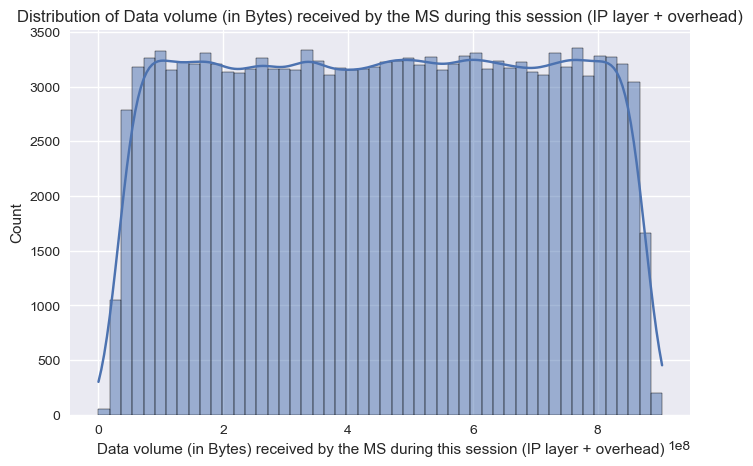

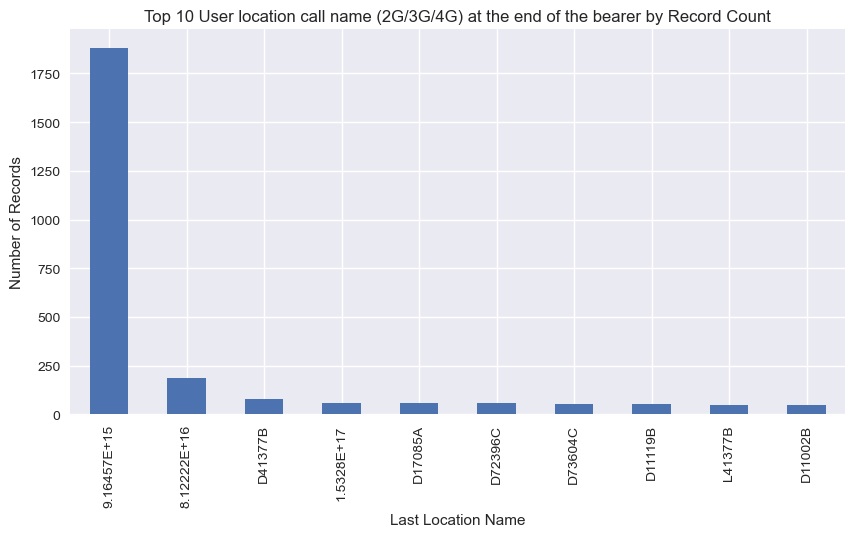

In [8]:
# Helper function for descriptions
def get_desc(col):
    return field_dict.get(col, col)

# Distribution of total download
col = "Total DL (Bytes)"
plt.figure(figsize=(8,5))
sns.histplot(telcom_data[col], bins=50, kde=True)
plt.title(f"Distribution of {get_desc(col)}")
plt.xlabel(get_desc(col))
plt.show()

# Top 10 locations by record count
plt.figure(figsize=(10,5))
telcom_data['Last Location Name'].value_counts().head(10).plot(kind='bar')
plt.title(f"Top 10 {get_desc('Last Location Name')} by Record Count")
plt.ylabel("Number of Records")
plt.show()


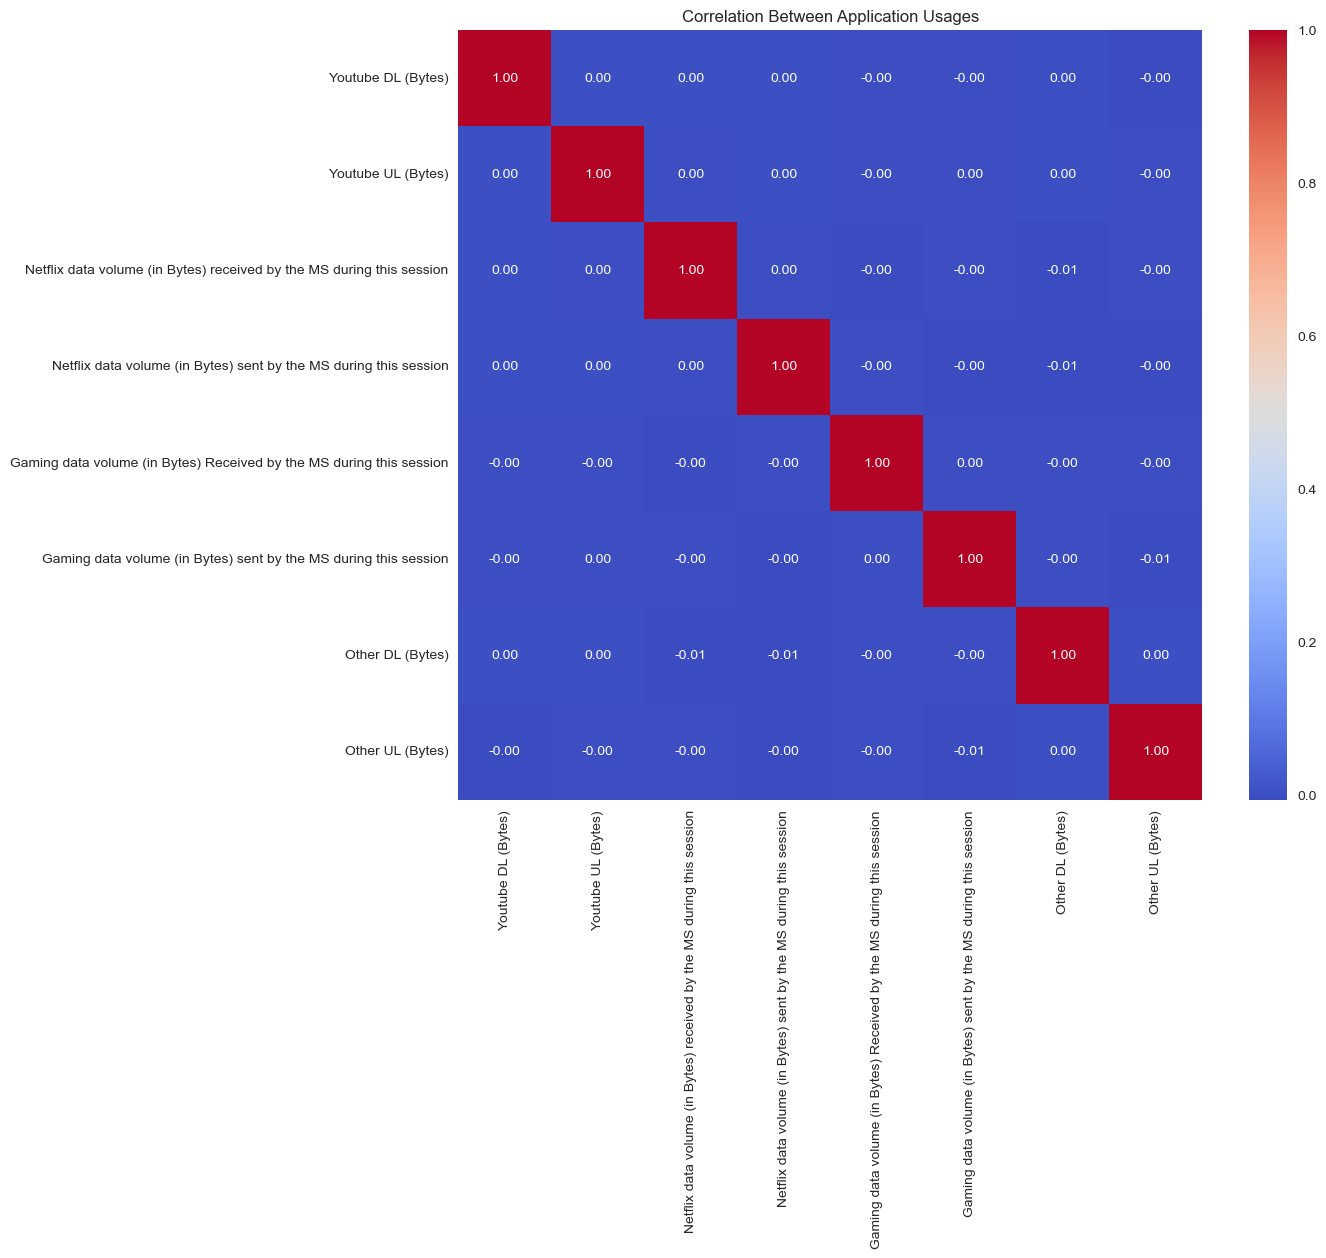

In [9]:
# Select application columns
app_cols = [
    "Youtube DL (Bytes)", "Youtube UL (Bytes)",
    "Netflix DL (Bytes)", "Netflix UL (Bytes)",
    "Gaming DL (Bytes)", "Gaming UL (Bytes)",
    "Other DL (Bytes)", "Other UL (Bytes)"
]

# Rename columns for readability
renamed_cols = {col: get_desc(col) for col in app_cols}
corr_matrix = telcom_data[app_cols].corr()
corr_matrix.rename(index=renamed_cols, columns=renamed_cols, inplace=True)

# Heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Application Usages")
plt.show()


C:\Users\ompra\AppData\Local\Temp\ipykernel_14116\4279055696.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="MSISDN/Number", y="Total DL (Bytes)", data=top_users, palette="viridis")


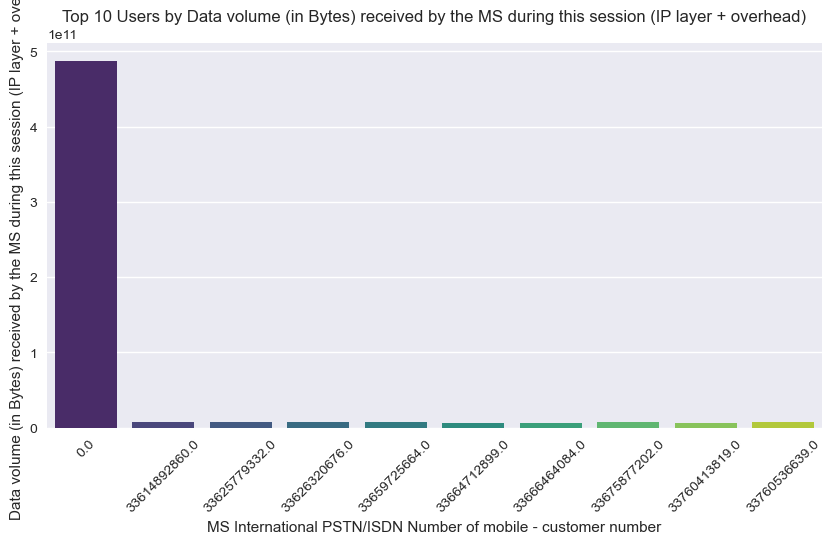

In [10]:
# Aggregate usage per user
user_usage = telcom_data.groupby("MSISDN/Number")[["Total DL (Bytes)", "Total UL (Bytes)"]].sum().reset_index()

# Top 10 users by download
top_users = user_usage.sort_values("Total DL (Bytes)", ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x="MSISDN/Number", y="Total DL (Bytes)", data=top_users, palette="viridis")
plt.title(f"Top 10 Users by {get_desc('Total DL (Bytes)')}")
plt.xlabel(get_desc("MSISDN/Number"))
plt.ylabel(get_desc("Total DL (Bytes)"))
plt.xticks(rotation=45)
plt.show()


In [11]:
print("✅ Data Cleaning Done")
print("✅ Univariate & Bivariate Analysis Completed")
print("✅ Aggregated User-Level Insights Generated")

print("\n📊 Key Insights Example:")
print(f"- Distribution of {get_desc('Total DL (Bytes)')} analyzed")
print(f"- Top 10 {get_desc('Last Location Name')}s identified")
print("- Correlations explored between YouTube, Netflix, Gaming, and Other app usage")
print(f"- Top 10 heavy data users (based on {get_desc('Total DL (Bytes)')}) identified")


✅ Data Cleaning Done
✅ Univariate & Bivariate Analysis Completed
✅ Aggregated User-Level Insights Generated

📊 Key Insights Example:
- Distribution of Data volume (in Bytes) received by the MS during this session (IP layer + overhead) analyzed
- Top 10 User location call name (2G/3G/4G) at the end of the bearers identified
- Correlations explored between YouTube, Netflix, Gaming, and Other app usage
- Top 10 heavy data users (based on Data volume (in Bytes) received by the MS during this session (IP layer + overhead)) identified
